In [1]:
# Created by GB - 10/22
# Google Colab was used in this code
import numpy as np
import pandas as pd
import PIL
import pathlib
import os
import random
import matplotlib.pyplot as plt
import warnings
np.random.seed(42)

In [2]:
from google.colab import drive
drive.mount('/content/drive/')
path1 = r'/content/drive/MyDrive/Colab Notebooks/Images/iron man comics_dir_resized'
path2 = r'/content/drive/MyDrive/Colab Notebooks/Images/spider man comics_dir_resized'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
    ## Preparing the data ##

# Convert images into numpy arrays #
# Concatenate the arrays #
# Shuffle #
# Split into train and test sets #

In [3]:
# Converting images to numpy arrays 
def numpy_arrays(path1,path2):
    delimiter = chr(92)
    path_list = []
    arrays_list1 = []
    arrays_list2 = []
    path_list.append(path1)
    path_list.append(path2)
    counter = 0
    for paths in range(len(path_list)):
        listdir = os.listdir(path_list[paths])
        counter += 1
        for items in listdir:
            items.split()
            if counter == 1:
                image = PIL.Image.open(path1+'/'+items) #problem with delimiter !WARNING!
            else:
                image = PIL.Image.open(path2+'/'+items)
            image_inf = image.getdata()
            sub_array = np.array(image_inf)
            if counter == 1:
                arrays_list1.append(sub_array)
            else:
                arrays_list2.append(sub_array)
    
    ones= np.ones((len(arrays_list1),), dtype=int)
    ones = ones.tolist()
    zeros= np.zeros((len(arrays_list2),), dtype=int)
    zeros = zeros.tolist()
    return arrays_list1,arrays_list2,ones,zeros

In [4]:
def conc_lists(array1,array2,ones,zeros):
    arrayX = array1
    arrayY = ones
    for i in range(len(array2)):
        arrayX.append(array2[i])
    for x in range(len(zeros)):
        arrayY.append(zeros[x])
        
    return arrayX, arrayY

In [5]:
def shuffle(X1,X2):
    X3 = list(zip(X1,X2))
    random.shuffle(X3)
    X1,X2 = zip(*X3)
    return X1,X2

In [6]:
def train_test_split(array1,array2,train_size):
        len_array1 = len(array1)
        len_array2 = len(array2)
        array1_train_size = int(train_size*len_array1)
        array2_train_size = int(train_size*len_array2)
        X_train = array1[:array1_train_size]
        Y_train = array2[:array1_train_size]
        X_test = array1[array2_train_size:]
        Y_test = array2[array2_train_size:]
        return X_train,Y_train,X_test,Y_test

In [7]:
# Calculating accuracy
def accuracy_s(y_true,y_pred):
    len_of_t = len(y_true)
    len_of_p = len(y_pred)
    true = 0
    if len_of_t != len_of_p:
        print("The sizes are not matched !")
    else:
        for _ in range(len_of_t):
            if y_true[_]==y_pred[_]:
                true += 1
    
    accuracy = true/len_of_t
    return accuracy

In [8]:
array1,array2,ones,zeros=numpy_arrays(path1,path2)
print('class 1 len: ',len(array1))
print('class 1 data type: ',type(array1))
print('class 1 image size (multiplicated): ',array1[1].shape)
print('class 2 len: ',len(array2))
print('class 2 data type: ',type(array2))
print('class 2 image size (multiplicated): ',array2[1].shape)
print('class 1 y len: ',len(ones))

class 1 len:  656
class 1 data type:  <class 'list'>
class 1 image size (multiplicated):  (160000,)
class 2 len:  656
class 2 data type:  <class 'list'>
class 2 image size (multiplicated):  (160000,)
class 1 y len:  656


In [9]:
# This part is used to concancate class arrays and their y values
arrayX,arrayY = conc_lists(array1,array2,ones,zeros)
len(arrayY)

1312

In [10]:
# This part is used to shuffle all data with same way.
# After running, we have more realistic data to classificate
array_X,array_Y = shuffle(arrayX,arrayY)
len(array_X)

1312

In [77]:
# This part is to split the data into train and test datas.
train_X,train_Y,test_X,test_Y=train_test_split(array_X,array_Y,train_size=0.9)
print('length of X values of train data: ',len(train_X))
print('length of Y values of train data: ',len(train_Y))
print('length of X values of test data: ',len(test_X))
print('length of Y values of test data: ',len(test_Y))
train_X = np.array(train_X)
train_Y = np.array(train_Y)
test_X = np.array(test_X)
test_Y = np.array(test_Y)

length of X values of train data:  1180
length of Y values of train data:  1180
length of X values of test data:  132
length of Y values of test data:  132


In [78]:
# Normalizing the datas #
standard_X_train =  (train_X - np.average(train_X)) / (np.std(train_X))
standard_X_test =  (test_X - np.average(test_X)) / (np.std(test_X))

In [ ]:
#### Classification with 2-Layer NN ####

In [13]:
def ReLU(x):
    return np.maximum(0,x)

In [15]:
def deriv_ReLU(x):
    return np.where(x <= 0,0,1)

In [16]:
def sigmoid_function(x):
    z = 1.0 / (1.0 + np.exp(-1*x))
    return z

In [17]:
def deriv_sigmoid_function(x):
    deriv = sigmoid_function(x)*(1-sigmoid_function(x))
    return deriv

## Constructing the Neural Network 

1. Every image has 400x400 size, meaning that, there are 160000 features
2. Our Neural Network will have 4 layers: **input, hidden 1, hidden 2, output**
3. Input layer should have 160000 nodes. For this project, there will be 64 and 32 neurons in hidden 1 and 2, respectively.
4. Since this is a binary classification task, there must be 2 nodes in output layer. However, we can also use 1 node.
5. Therefore, our NN can be structured as **[160000, 64, 32, 1]**
6. In this neural network, **ReLU is going to be used as activation function, and Sigmoid in the output layer**
7. Also, **binary cross-entropy** loss should be used for binary classification task


In [94]:
NN_structure = [160000, 64, 32, 1]

## Parameter Initialization

1. Parameters must be kept in directories. This is one of the best method to deal with Neural Networks
2. Since we have 4 layers (i, h1, h2, o), there must be 3 weight and bias matrices
3. Parameter initialization is quite important to have optimal results.
4. Different initalization will have significant effects on train-test accuracies and losses

In [97]:
param_inits = {}
nodes_input = NN_structure[0]
neurons_hidden1 = NN_structure[1]
neurons_hidden2 = NN_structure[2]
nodes_output = NN_structure[3]
param_inits = {
    'w1':np.random.randn(neurons_hidden1,nodes_input) * 0.1, # 64 x 160000
    'w2':np.random.randn(neurons_hidden2,neurons_hidden1) * 0.1, # 32 x 64
    'w3':np.random.randn(nodes_output,neurons_hidden2) * 0.1, # 1 x 32
    'b1':np.zeros((neurons_hidden1,1)), # 64 x 1
    'b2':np.zeros((neurons_hidden2,1)), # 32 x 1
    'b3':np.zeros((nodes_output,1)) # 1 x 1 
}

In [68]:
param_inits['w1']

array([[-0.04512706,  0.13849104,  0.20473381, ..., -0.00205268,
         0.11231211,  0.14708011],
       [-0.01254135,  0.01355994,  0.08764705, ..., -0.02592299,
         0.0186411 ,  0.029131  ],
       [ 0.11274535,  0.00312907,  0.02775935, ...,  0.04785185,
        -0.0204601 , -0.01515419],
       ...,
       [ 0.14565289, -0.17898843,  0.10777891, ...,  0.07292534,
         0.06286869,  0.1256674 ],
       [-0.04013923, -0.12563509, -0.04489789, ...,  0.01724786,
         0.16121285, -0.0612754 ],
       [ 0.01524406,  0.08238117, -0.09101522, ..., -0.05226903,
         0.09109471, -0.16983635]])

In [70]:
len(train_Y)

1180

### Loss Function
Binary Cross-Entropy Loss will be used for this binary classification task

In [81]:
def Binary_Cross_Entropy(y, t):
    lenx = len(y)
    loss = np.dot(t,np.log(y).T) + np.dot((1-t),np.log((1-y)).T)
    lossf = -loss/lenx
    lossff = float(np.squeeze(lossf))
    return lossff

## Forward Propagation

##### For this code, N_n means net (not activated) for layer n; O_n means out (activated) for layer n

Forward propagation is the process to build mathematical relationship between inputs and outputs. <br>
To do this, weights and biases are used. The process is actually simple matrix multiplication **y = w.x + b** <br>
This multiplication gives not activated results. Neural networks use nonlinear activation functions to have better solutions **(universal approximation theorem)** <br>
For this project, **ReLU** was used as activation function in hidden layers and **Sigmoid** for the output layer.

In [82]:
# Forward propagation #
# N_n = net for layer n (unactivated)
# O_n = outputs for layer n (activated)
def forward_prop(X, parameters):

    params = parameters
    
    # hidden layer 1
    params['N_1'] = np.dot(params['w1'], X.T) + params['b1']
    params['O_1'] = ReLU(params['N_1'])
    #print('O_1: ', params['O_1'])
    # hidden layer 2
    params['N_2'] = np.dot(params['w2'], params['O_1']) + params['b2']
    params['O_2'] = ReLU(params['N_2'])
    #print('O_2: ', params['O_2'])
    # output layer
    params['N_3'] = np.dot(params['w3'],params['O_2']) + params['b3']
    params['O_3'] = sigmoid_function(params['N_3'])

    return params,params['O_3']

## Back Propagation

Back propagation is the process to optimize the parameters to have better results. <br>
To do this, chain rule is used to optimize the parameters. <br>
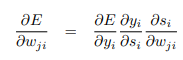

The goal is basically to measure the effect of a weight on loss function. As it is said, ReLU and Sigmoid was used in this project. Sigmoid with Binary Cross-Entropy loss gives mathematical easiness to calculate the partial derivatives <br>
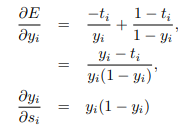 <br>
This gives **(y - t)** which is **(forward_out - Y)** in the code.

**Every db and db value must be calculated before coding. Different activation - loss function can give different results !**

In [83]:
# Back propagation #
def back_prop_upd(X,Y, parameters, forward_out,learning_rate):
    params = parameters
    len = X.shape[0]
    dO = forward_out - Y
    # Update w3 and b3
    dw3 = np.dot(dO,params['O_2'].T) * (1/len) # Binary Cross-Entropy * Sigmoid * N_3 Partial Derivatives
    db3 = np.sum(dO, axis=1, keepdims= True) * (1/len) 

    #Update w2 and b2
    dZ2 = np.dot(params['w3'].T,dO) * deriv_ReLU(params['N_2'])
    #print('dZ2: ',dZ2)
    dw2 = np.dot(dZ2, params['O_1'].T) * (1/len)
    db2 = np.sum(dZ2, axis= 1, keepdims = True) * (1/len)

    #Update w1 and b1
    dZ3 = np.dot(params['w2'].T,dZ2) * deriv_ReLU(params['N_1'])
    dw1 = np.dot(dZ3,X) * (1/len)
    db1 = np.sum(dZ3, axis= 1, keepdims = True) * (1/len)
    #print('dZ3: ',dZ3)

    # Updating
    params['w3'] = params['w3'] - learning_rate * dw3
    params['b3'] = params['b3'] - learning_rate * db3
    params['w2'] = params['w2'] - learning_rate * dw2
    params['b2'] = params['b2'] - learning_rate * db2
    params['w1'] = params['w1'] - learning_rate * dw1
    params['b1'] = params['b1'] - learning_rate * db1

    return params

### Observing overfitting
In this part, the goal is to observe changing in loss and accuracies in train and test data. <br>
The expected thing is **<i/> underfitting - overfitting <i/>** during the iterations. <br>
But, it might not be possible to see expected results because of the data. <br>
If inputs and outputs have weak or no relationship. The results might be unexpected. <br>

The output of this code means that: <br>
1- Training loss decreases during epochs <br>
2- Test loss increases during epochs <br>
3- Both accuracies increase during epochs <br>
These are the signs of overfitting. <br>
In the first few iterations errors have their highest values and rapidly decreases. Therefore, underfitting period is quite short. <br>
Dataset might be changed to observe clearer results.

In [96]:
# Running Neural Network

learning_rate = 0.05
epochs = 300
threshold = 0.5
train_loss_list = []
test_loss_list = []
for i in range(epochs):
    i += 1
    params1, forward_out1 = forward_prop(standard_X_train,param_inits)
    new_params = back_prop_upd(standard_X_train, train_Y, params1, forward_out1, learning_rate)
    param_inits = new_params
    if i % 20 == 0:
        print('Epoch: ', i)
        #params_tr, y_t_pred = forward_prop(standard_X_train, new_params)
        loss = Binary_Cross_Entropy(forward_out1, train_Y)
        train_loss_list.append(loss)
        print('train loss: ', loss)
        predictions = (forward_out1 > threshold)
        pred_list = predictions[0]
        params_t, ypred = forward_prop(standard_X_test, new_params)
        test_loss = Binary_Cross_Entropy(ypred, test_Y)
        test_loss_list.append(test_loss)
        predictions_t = (ypred > threshold)
        pred_list_t = predictions_t[0]
        print('test loss: ', test_loss)
        print('train accuracy: ', accuracy_s(pred_list, train_Y))
        print('test accuracy: ', accuracy_s(pred_list_t, test_Y))

Epoch:  20
train loss:  750.8462816538123
test loss:  98.52706286898551
train accuracy:  0.6228813559322034
test accuracy:  0.4393939393939394
Epoch:  40
train loss:  687.997281863961
test loss:  105.95461952825474
train accuracy:  0.6754237288135593
test accuracy:  0.4090909090909091
Epoch:  60
train loss:  611.5840025214255
test loss:  119.4658338656828
train accuracy:  0.7389830508474576
test accuracy:  0.42424242424242425
Epoch:  80
train loss:  528.6072610535875
test loss:  138.2063583968363
train accuracy:  0.7830508474576271
test accuracy:  0.42424242424242425
Epoch:  100
train loss:  448.2877617847417
test loss:  160.01969868403177
train accuracy:  0.8245762711864407
test accuracy:  0.4318181818181818
Epoch:  120
train loss:  369.51377227680655
test loss:  182.35607320683133
train accuracy:  0.8533898305084746
test accuracy:  0.4772727272727273
Epoch:  140
train loss:  307.3320902229566
test loss:  204.24015596652774
train accuracy:  0.8720338983050847
test accuracy:  0.4696969

In [98]:
# Running Neural Network

learning_rate = 0.05
epochs = 180
threshold = 0.5
trainp_loss_list = []
testp_loss_list = []
for i in range(epochs):
    i += 1
    params1, forward_out1 = forward_prop(standard_X_train,param_inits)
    new_params = back_prop_upd(standard_X_train, train_Y, params1, forward_out1, learning_rate)
    param_inits = new_params
    loss = Binary_Cross_Entropy(forward_out1, train_Y)
    trainp_loss_list.append(loss)
    predictions = (forward_out1 > threshold)
    pred_list = predictions[0]
    params_t, ypred = forward_prop(standard_X_test, new_params)
    test_loss = Binary_Cross_Entropy(ypred, test_Y)
    testp_loss_list.append(test_loss)
    predictions_t = (ypred > threshold)
    pred_list_t = predictions_t[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


In [99]:
iterations = []
c = 0
for i in range(180):
    c += 1
    iterations.append(c)


In [100]:
len(iterations)

180

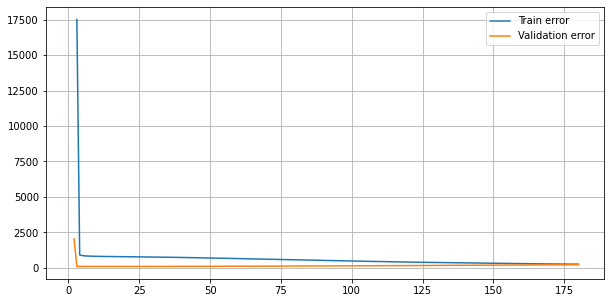

In [101]:
plt.rcParams['figure.figsize']=[10,5]
b = trainp_loss_list
c = testp_loss_list
a = iterations
plt.plot(a,b,label = 'Train error')
plt.plot(a,c,label = 'Validation error')
plt.legend()
plt.grid(True)
plt.show()

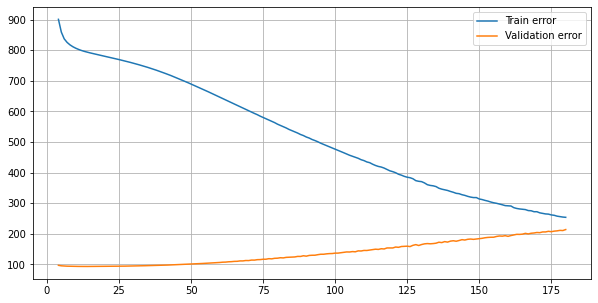

In [106]:
plt.rcParams['figure.figsize']=[10,5]
b = trainp_loss_list[3:]
c = testp_loss_list[3:]
a = iterations[3:]
plt.plot(a,b,label = 'Train error')
plt.plot(a,c,label = 'Validation error')
plt.legend()
plt.grid(True)
plt.show()